In [1]:
# To train call 'neat_train.py' with arguments.
!python neat_train.py -h

usage: neat_train.py [-h] [-d DEFAULT] [-p HYPERPARAM] [-o OUTPREFIX]
                     [-n NUM_WORKER]

Evolve NEAT networks

options:
  -h, --help            show this help message and exit
  -d DEFAULT, --default DEFAULT
                        default hyperparameter file
  -p HYPERPARAM, --hyperparam HYPERPARAM
                        hyperparameter file
  -o OUTPREFIX, --outPrefix OUTPREFIX
                        file name for result output
  -n NUM_WORKER, --num_worker NUM_WORKER
                        number of cores to use


In [2]:
# Train using default NEAT parameters on cart-pole swing-up with a small population and few generations
# !cat p/quickTest.json
# !python neat_train.py -p p/quickTest.json

Text(0, 0.5, 'Fitness')

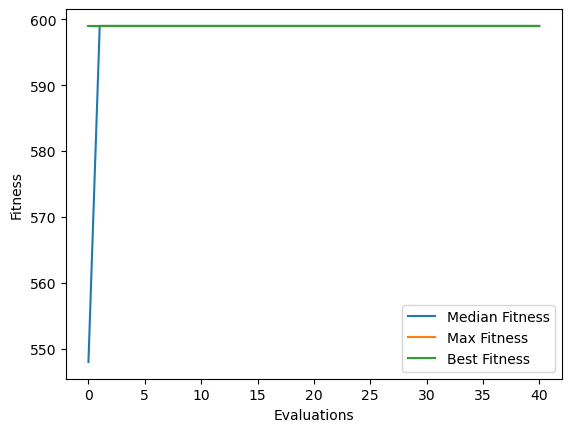

In [3]:
# -- View stats of a completed run
# Rows:
# 0 - Fitness evaluations used
# 1 - Median fitness of population
# 2 - Max fitness of population
# 3 - Top fitness every achieved
# 4 - Median number of nodes of individuals in population
# 5 - Median number of connections of individuals in population
from matplotlib import pyplot as plt
import numpy as np
exp_prefix = 'ants-neat'
stats = np.loadtxt('log/' + exp_prefix + '_stats.out', delimiter=',')
fig, ax = plt.subplots()
x = stats[:,0]
y = stats[:,[1,2,3]]
plt.plot(y)
plt.legend(['Median Fitness','Max Fitness','Best Fitness'])
plt.xlabel('Evaluations')
plt.ylabel('Fitness')

0040.out
# of Connections in ANN:  44
# of Connections in ANN:  44


/opt/homebrew/Caskroom/miniforge/base/envs/wannts/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

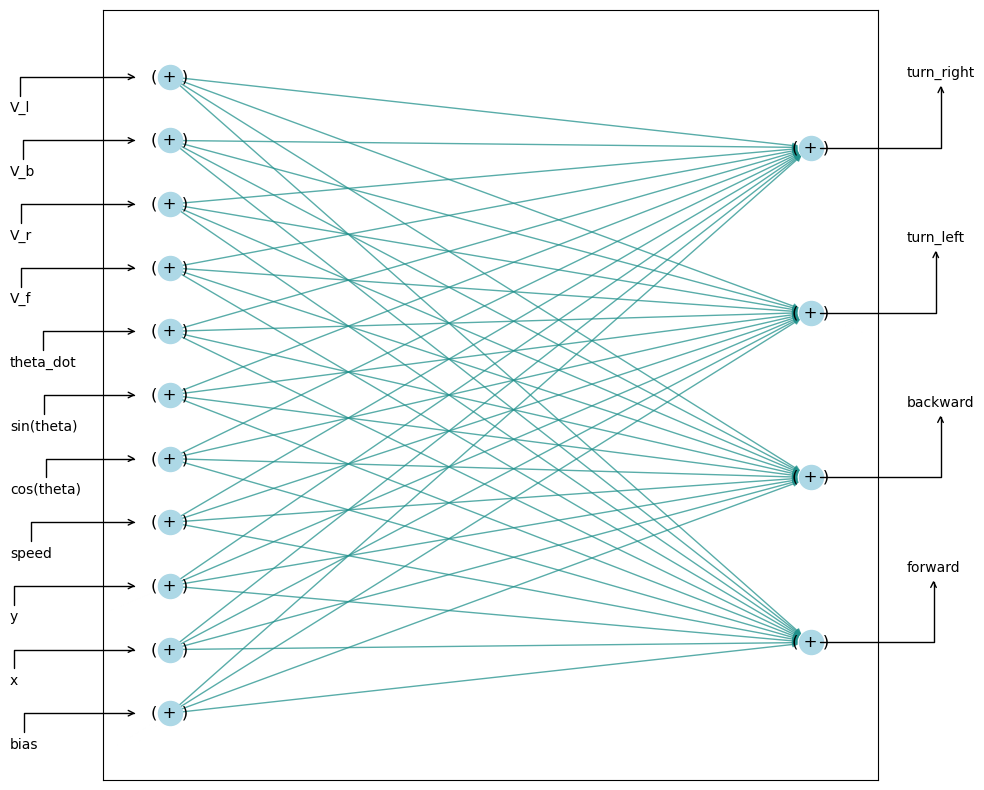

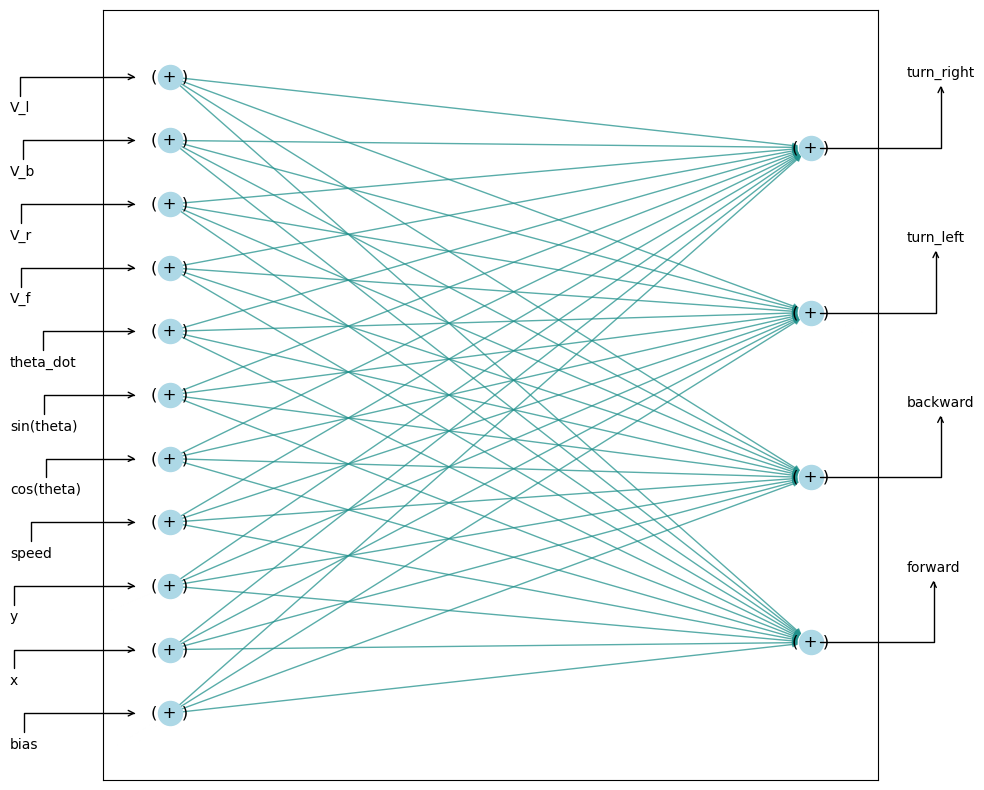

In [4]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import os
import vis as nv

def find_max_out_file_number(directory):
    # List all files in the specified directory
    files = os.listdir(directory)

    # Filter out files with the .out extension and extract their numerical part
    out_file_numbers = [
        filename.split('.')[0] for filename in files if filename.endswith('.out')\
                                                          and filename.split('.')[0].isdigit()
    ]

    # Find the maximum file number if there are any .out files
    if out_file_numbers:
        return sorted(out_file_numbers)[-1]
    else:
        return "No '.out' files found in the directory."

# Specify the directory you want to search in
max_file_num = find_max_out_file_number('log/' + exp_prefix + '_best/')
print(max_file_num + '.out')
nv.viewInd('log/{0}_best/{1}.out'.format(exp_prefix, "0008"), 'ant_dynamics')
nv.viewInd('log/{0}_best/{1}.out'.format(exp_prefix, max_file_num), 'ant_dynamics')

In [5]:
# -- View Behavior of Network
# !python neat_test.py -p p/laptop_slime.json -i log/slimevolley-neat-laptop_best.out -r 3 --view True
max_file_num = find_max_out_file_number('log/' + exp_prefix + '_best/')
print('Latest:', max_file_num)
!pwd
!python neat_test.py -p p/laptop_slime.json -i log/{exp_prefix}_best/{max_file_num}.out -r 1 --view True --gif True

Latest: 0040
/Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/wannts/prettyNeatWann


usage: neat_test.py [-h] [-i INFILE] [-o OUTPREF] [-d DEFAULT] [-p HYPERPARAM]
                    [-r NREPS] [-v VIEW]
neat_test.py: error: unrecognized arguments: --gif True


In [6]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
nv.viewInd('log/slimevolley-neat-sp-subset_pop/ind_18.out','slimevolley')

# pop = nv.loadPop('log/slimevolley-neat-laptop_pop.obj')
# nv.viewInd(pop[13],'slimevolley')

FileNotFoundError: log/slimevolley-neat-sp-subset_pop/ind_18.out not found.

In [ ]:
# -- Compare Replicates
# Run several experiments
#  for i in {0..10}; do python neat_train.py -p p/swingup.json -n 96 -o tanh_$i; done
#  for i in {0..10}; do python neat_train.py -p p/swing_allAct.json -n 96 -o allAct_$i; done
#
# View results as median and quartiles
#
# import vis as nv
# experiment_1 = 'demo/swingup/tanh'
# experiment_2 = 'demo/swingup/allAct'
# _,_,bestRun = nv.viewReps([experiment_1,experiment_2],label=['Tanh Only','All Activation Functions'],\
#                            title='Best Fitness Found with Uniform or Diverse Activations',getBest=True)